# Домашнее задание 3.

`Keras` и сверточные нейронные сети.

In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.5


Using TensorFlow backend.


In [0]:
def reset_tf_session():
    curr_session = tf.get_default_session()
    if curr_session is not None:
        curr_session.close()
    K.clear_session()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

## Задание 1 — инициализация весов CNN (3 балла).

В этом задании нужно будет исследовать, как выбор функции инициализации весов влияет на обучение CNN.


Продолжим работать с датасетом CIFAR-10.

In [3]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

# нормализуем входные данные
x_train = x_train / 255 - 0.5
x_test = x_test / 255 - 0.5

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 2s 0us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.models import load_model

Определим функцию `fit_model` с архитектурой архитектура CNN.

Метод `model.fit` возвращает объект класса `keras.callbacks.History()` — это колбэк, который автоматически применяется ко всем моделям и логирует много чего полезного. В частности логируются значения функции потерь на каждой итерации.

**Задание 1.1** (0.5 балла) Добавьте в архитектуру модели инициализацию весов для тех слоев, где она необходима.


In [0]:
def fit_model(initializer='glorot_normal'):
    s = reset_tf_session()  
    INIT_LR = 5e-3
    BATCH_SIZE = 32
    EPOCHS = 10
   
    def lr_scheduler(epoch):
        return INIT_LR * 0.9 ** epoch  

    model = Sequential()
    model.add(Conv2D(filters=16, padding='same', kernel_size=(3,3), input_shape=(32,32,3), init=initializer)) # добавили иницализацию весов здесь
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init=initializer))  # и здесь
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(40, init=initializer)) # а еще здесь
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))    
    model.add(Dense(10, init=initializer)) # и здесь
    model.add(Activation("softmax"))


    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.adamax(lr=INIT_LR),
        metrics=['accuracy']
    )
  
    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler)],                   
        shuffle=True,
        verbose=0,
        initial_epoch=0    
    )

    # Возвращаем объект класса keras.callbacks.History
    return history

**Задание 1.2** (1.5 балла). Обучите модель с разными [функциями инициализации](https://keras.io/initializers/) весов:
* `Zeros` — веса инициализируются нулями
* `Constant=0.05` — веса инициализируются константой 0.05
* `RandomUniform` — веса генерируются равномерно из отрезка [-0.05, 0.05]
* `glorot_normal` — Xavier initializer из лекций
* `lecun_uniform`

Добавьте в список `losses` значения функции потерь для каждой функции инициализации, их можно достать из `History`



In [6]:
losses = []
ini = ['glorot_normal', 'zeros', keras.initializers.Constant(value=0.05), 'random_uniform', 'lecun_uniform']

losses.append([fit_model(initializer=i).history['loss'] for i in ini])
losses







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="glorot_normal")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="glorot_normal")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, kernel_initializer="glorot_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="glorot_normal")`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="zeros")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="zeros")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, kernel_initializer="zeros")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="zeros")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, padding="

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=16, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="random_uniform")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="random_uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, kernel_initializer="random_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, kernel_initializer="random_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 

[[[1.4927609439849854,
   1.1803360075759888,
   1.0658960352516174,
   0.9942033225440979,
   0.9384321302032471,
   0.8920300806045532,
   0.8516941950035095,
   0.813574034538269,
   0.7834670532798768,
   0.7553397636699677],
  [2.3029067127990723,
   2.302841442565918,
   2.302835273361206,
   2.30282397857666,
   2.302801638031006,
   2.302799586791992,
   2.30273764465332,
   2.3027309446716306,
   2.3027036161804197,
   2.30273495552063],
  [2.3724254260253907,
   2.0056744282531738,
   1.7685615072250367,
   1.6272051699066161,
   1.5197091971969605,
   1.4419218523025512,
   1.3828282614135743,
   1.3406158241653443,
   1.2954468786239624,
   1.261221920776367],
  [1.6049939125823975,
   1.3059864088821411,
   1.1711389640045167,
   1.0849368831825257,
   1.0227625375556946,
   0.9785696961402893,
   0.9338352185058594,
   0.9008535656547546,
   0.8720610445785523,
   0.8439824709701538],
  [1.5025777950668335,
   1.1781153899002075,
   1.0716263907623291,
   0.99741415109634

**Задание 1.3** (1 балла). Постройте графики зависимости функций потерь от номера итерации, подпишите их. Прокомментируйте результат.

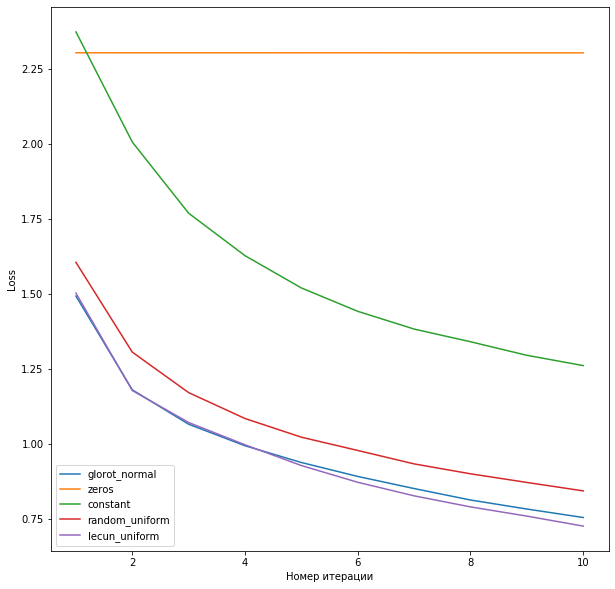

In [7]:
fig = plt.figure(0, (10,10))
ini = ['glorot_normal', 'zeros', 'constant', 'random_uniform', 'lecun_uniform']
for i in range(5) :
    plt.plot(range(1, 11), losses[0][i], label = '%s' % ini[i])

plt.xlabel('Номер итерации')
plt.ylabel('Loss')
plt.legend()

## Задание 2 — CNN для CIFAR-10 с сохранением весов модели (7 баллов)

В этом задании мы модифицируем нейросеть с семинара, чтобы она достигала большего значения `accuracy` и научимся сохранять веса модели в файл во время обучения. Можно использовать только те же слои, которые использовались на семинаре: `Conv2D, MaxPooling2D,  LeakyReLU, Dropout, Flatten, Dense`.

**Задание 2.1** (4 балла). Подберите архитектуру модели так, чтобы значение `accuracy` на тестовой выборке было не менее 85.

In [0]:
def make_model(): 
    model = Sequential()
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), input_shape=(32,32,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=64, padding='same', kernel_size=(3,3), init='lecun_uniform'))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=128, padding='same', kernel_size=(3,3), init='lecun_uniform'))  
    model.add(LeakyReLU(0.1))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
    model.add(Dropout(0.25)) 
    model.add(Flatten())
    model.add(Dense(512, init='lecun_uniform'))
    model.add(LeakyReLU(0.1))
    model.add(Dropout(0.5))    
    model.add(Dense(10, init='lecun_uniform'))             
    model.add(Activation("softmax"))
    
    return model

In [9]:
s = reset_tf_session()
model = make_model()
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="lecun_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)      

In [0]:

def fit_model(INIT_LR=5e-3, BATCH_SIZE=32, epoch=20):
 
    s = reset_tf_session()  
 
    def lr_scheduler(epoch):
        return INIT_LR * 0.9 ** epoch  

    model = make_model()
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.adamax(lr=INIT_LR),
        metrics=['accuracy']
    )
  
    class LrHistory(keras.callbacks.Callback):

      def on_epoch_begin(self, epoch, logs={}):
        print("Learning_rate:", K.get_value(model.optimizer.lr))

    history = model.fit(
        x_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=epoch,
        callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
                   LrHistory(),],
        validation_data=(x_test, y_test),                   
        shuffle=True,
        verbose=1,
        initial_epoch=0    
    )

    return history

In [11]:
fit_model()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="lecun_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
Learning_rate: 0.005
50000/50000 [==============================] - 64s 1ms/step - loss: 1.8022 - acc: 0.2879 - val_loss: 1.3547 - val_acc: 0.4710
Epoch 2/20
Learning_rate: 0.0045
50000/50000 [==============================] - 62s 1ms/step - loss: 1.2678 - acc: 0.5379 - val_loss: 1.0434 - val_acc: 0.6377
Epoch 3/20
Learning_rate: 0.00405
50000/50000 [==============================] - 62s 1ms/step - loss: 1.0144 - acc: 0.6489 - val_loss: 0.9051 - val_acc: 0.6922
Epoch 4/20
Learning_rate: 0.003645
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8873 - acc: 0.7006 - val_loss: 0.7913 - val_acc: 0.7287
Epoch 5/20
Learning_rate: 0.0032805
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7776 - acc: 0.7421 - val_loss: 0.7192 - val_acc: 0.7594
Epoch 6/20
Learning_rate: 0.00295245
50000/50000 [==============================] - 60s 1ms/step - loss: 0.7031 - acc: 0.7675 - val_loss: 0.6782 - val

# неужееееееееееееееелииииииииииии 0.85

**Задание 2.2** (2 балла). Реализуйте колбэк, который сохраняет модель в `.hdf5` файл и печатает имя файла, в который была сохранена модель. Используйте функцию `model_save`. Строка с именем файла имеет вид `<name>_{0:02d}.hdf5`, отформатируйте ее так, чтобы в имени строки фигурировал номер эпохи.

In [0]:
from keras.models import save_model, load_model

class ModelSaveCallback(keras.callbacks.Callback):

    def __init__(self, model, file_name):
        super().__init__()
        self.file_name = file_name
        self.model = model

    def on_epoch_end(self, epoch, logs=None):
        save_model(self.model, self.file_name.format(epoch))
        print('{}'.format(self.file_name.format(epoch)))


**Задание 2.3** (1 балл). Реализуйте функцию, которая с помощью `load_model` будет загружать модель из файла.

In [0]:
def load_from_file(model_filename, last_epoch):
    return load_model(model_filename.format(last_epoch))

In [15]:
INIT_LR = 5e-3
BATCH_SIZE = 32
EPOCHS = 20

model_filename = 'weights_{0:02d}.hdf5'

s = reset_tf_session()

model = make_model()

model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.adamax(lr=INIT_LR),
    metrics=['accuracy']
)

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch 

# в случае, если обучение было прервано, можно загрузить модель из файла, 
# соответствующего последней эпохе, за которую есть сохраненные веса
model = load_from_file(model_filename, 4)
  
history = model.fit(
    x_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler),
               # не забудьте передать сюда ModelSaveCallback
               ModelSaveCallback(model, model_filename)
              ],
    validation_data=(x_test, y_test),
    shuffle=True,
    verbose=0
    )
  
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), input_shape=(32, 32, 3..., kernel_initializer="lecun_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=64, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(filters=128, padding="same", kernel_size=(3, 3), kernel_initializer="lecun_

weights_00.hdf5
weights_01.hdf5
weights_02.hdf5
weights_03.hdf5
weights_04.hdf5
weights_05.hdf5
weights_06.hdf5
weights_07.hdf5
weights_08.hdf5
weights_09.hdf5
weights_10.hdf5
weights_11.hdf5
weights_12.hdf5
weights_13.hdf5
weights_14.hdf5
weights_15.hdf5
weights_16.hdf5
weights_17.hdf5
weights_18.hdf5
weights_19.hdf5
